In [30]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [31]:
# Directory setup
base_dir = "../PPT_Kelompok_Klasifikasi Objek pada Koridor Gedung Pascasarjana PENS/augmented_images"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

In [32]:
# Check if directories exist
assert os.path.exists(train_dir), "Train directory does not exist!"
assert os.path.exists(validation_dir), "Validation directory does not exist!"
assert os.path.exists(test_dir), "Test directory does not exist!"

In [33]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(100, 50), batch_size=batch_size, class_mode="categorical"
)
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 50),
    batch_size=batch_size,
    class_mode="categorical",
)

Found 560 images belonging to 8 classes.
Found 280 images belonging to 8 classes.


In [34]:
class_names_train = train_generator.class_indices
class_names_validation = validation_generator.class_indices

print("Nama Kelas Train:", class_names_train)
print("Nama Kelas Validation:", class_names_validation)

Nama Kelas Train: {'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7}
Nama Kelas Validation: {'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7}


In [35]:
# Model definition
img_input = layers.Input(shape=(100, 50, 3))
x = layers.Conv2D(16, 3, activation="relu")(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(50, activation="relu")(x)
output = layers.Dense(len(class_names_train), activation="softmax")(x)
model = Model(img_input, output)
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["acc"])

In [36]:
# Calculate steps per epoch
total_train_samples = sum([len(files) for r, d, files in os.walk(train_dir)])
total_validation_samples = sum([len(files) for r, d, files in os.walk(validation_dir)])

steps_per_epoch = total_train_samples // batch_size
validation_steps = total_validation_samples // batch_size

In [37]:
# Model training
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    verbose=2,
)

Epoch 1/100


17/17 - 2s - loss: 2.0811 - acc: 0.1402 - val_loss: 2.0159 - val_acc: 0.2773 - 2s/epoch - 112ms/step
Epoch 2/100
17/17 - 1s - loss: 2.0395 - acc: 0.2083 - val_loss: 2.0095 - val_acc: 0.2344 - 1s/epoch - 66ms/step
Epoch 3/100
17/17 - 1s - loss: 2.0017 - acc: 0.2254 - val_loss: 2.0016 - val_acc: 0.2461 - 699ms/epoch - 41ms/step
Epoch 4/100
17/17 - 1s - loss: 1.9533 - acc: 0.2633 - val_loss: 1.9531 - val_acc: 0.1172 - 671ms/epoch - 39ms/step
Epoch 5/100
17/17 - 1s - loss: 1.9060 - acc: 0.2917 - val_loss: 1.9321 - val_acc: 0.2930 - 667ms/epoch - 39ms/step
Epoch 6/100
17/17 - 1s - loss: 1.8426 - acc: 0.3333 - val_loss: 1.9423 - val_acc: 0.2188 - 680ms/epoch - 40ms/step
Epoch 7/100
17/17 - 1s - loss: 1.8284 - acc: 0.3258 - val_loss: 1.8535 - val_acc: 0.1641 - 673ms/epoch - 40ms/step
Epoch 8/100
17/17 - 1s - loss: 1.7239 - acc: 0.3879 - val_loss: 1.8337 - val_acc: 0.2773 - 707ms/epoch - 42ms/step
Epoch 9/100
17/17 - 1s - loss: 1.7682 - acc: 0.3390 - val_loss: 1.7717 - val_acc: 0.2578 - 704ms/

In [38]:
import matplotlib.pyplot as plt

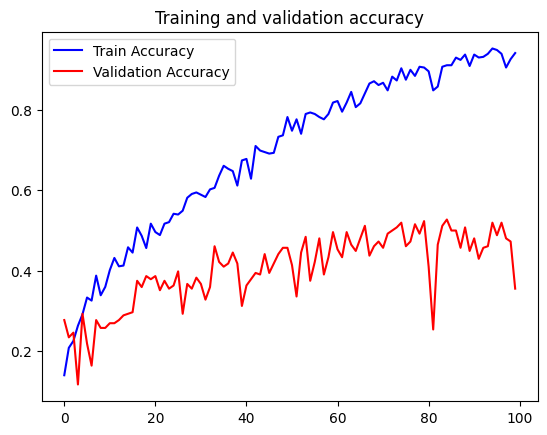

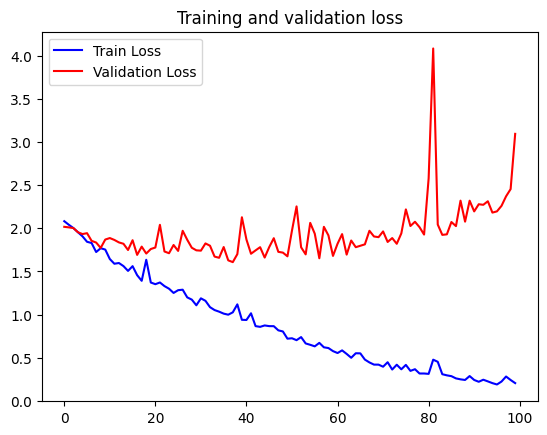

In [39]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))
plt.plot(epochs, acc, color="b", label="Train Accuracy")
plt.plot(epochs, val_acc, color="r", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, color="b", label="Train Loss")
plt.plot(epochs, val_loss, color="r", label="Validation Loss")
plt.title("Training and validation loss")
plt.legend()

In [40]:
model.save("CNN.h5")
print(model.metrics_names)

['loss', 'acc']


In [41]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [42]:
img = load_img(
    "../PPT_Kelompok_Klasifikasi Objek pada Koridor Gedung Pascasarjana PENS/augmented_images/test/banana/Image_10_6.jpg",
    False,
    target_size=(100, 50),
)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
print("Nilai Output Units:\n", preds)
index_preds = np.argmax(preds)
print("\nPredicted :", index_preds)

Nilai Output Units:
 [[0. 1. 0. 0. 0. 0. 0. 0.]]

Predicted : 1


In [43]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [44]:
img = load_img(
    "../PPT_Kelompok_Klasifikasi Objek pada Koridor Gedung Pascasarjana PENS/augmented_images/test/carrot/Image_10_1.jpg",
    False,
    target_size=(100, 50),
)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
print("Nilai Output Units:\n", preds)
index_preds = np.argmax(preds)
print("\nPredicted :", index_preds)

Nilai Output Units:
 [[0. 0. 0. 0. 0. 0. 1. 0.]]

Predicted : 6
